In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import MeanSquaredError
import cv2
import numpy as np
import os
from glob import glob
from sklearn.model_selection import train_test_split

# Load images function
def load_images(image_dir, image_size=(256, 256)):
    images = []
    for img_path in glob(os.path.join(image_dir, "*.png")):  # Assuming images are in PNG format
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, image_size)
            img = img / 255.0  # Normalize to [0, 1]
            images.append(img)
    print(f"Loaded {len(images)} images from {image_dir}")
    return np.array(images)

# Load clean images (HR) and noisy images (LR)
X_train = load_images(r'E:\SLIIT\Year 3\Semester 2\Digital Image Processing\Image Tool\Training Data\DIV2K_train_HR')
y_train = load_images(r'E:\SLIIT\Year 3\Semester 2\Digital Image Processing\Image Tool\Training Data\DIV2K_train_LR_x8')

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Build the Denoising Model
def build_denoising_model():
    model = Sequential()
    model.add(Input(shape=(256, 256, 3)))  # Input layer
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), padding='same'))
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))

    # Compile the model with the MeanSquaredError function directly
    model.compile(optimizer='adam', loss=MeanSquaredError())
    return model

# Instantiate the model
model = build_denoising_model()
model.summary()  # View the model architecture

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val))

# Save the model for later use
model.save('denoising_model.h5')


Loaded 800 images from E:\SLIIT\Year 3\Semester 2\Digital Image Processing\Image Tool\Training Data\DIV2K_train_HR
Loaded 800 images from E:\SLIIT\Year 3\Semester 2\Digital Image Processing\Image Tool\Training Data\DIV2K_train_LR_x8


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 256, 256, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 256, 256, 3)    │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,763 (6.89 KB)

 Trainable params: 1,763 (6.89 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 179ms/step - loss: 0.0697 - val_loss: 0.0377
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 173ms/step - loss: 0.0312 - val_loss: 0.0110
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 172ms/step - loss: 0.0096 - val_loss: 0.0060
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 171ms/step - loss: 0.0060 - val_loss: 0.0044
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 173ms/step - loss: 0.0046 - val_loss: 0.0036
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 170ms/step - loss: 0.0039 - val_loss: 0.0032
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 173ms/step - loss: 0.0034 - val_loss: 0.0029
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 169ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 175ms/step - loss: 0.0029 - val_loss: 0.0026
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 172ms/step - loss: 0.0027 - val_loss: 0.0025
Epoch 11/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 174ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 12/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 179ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


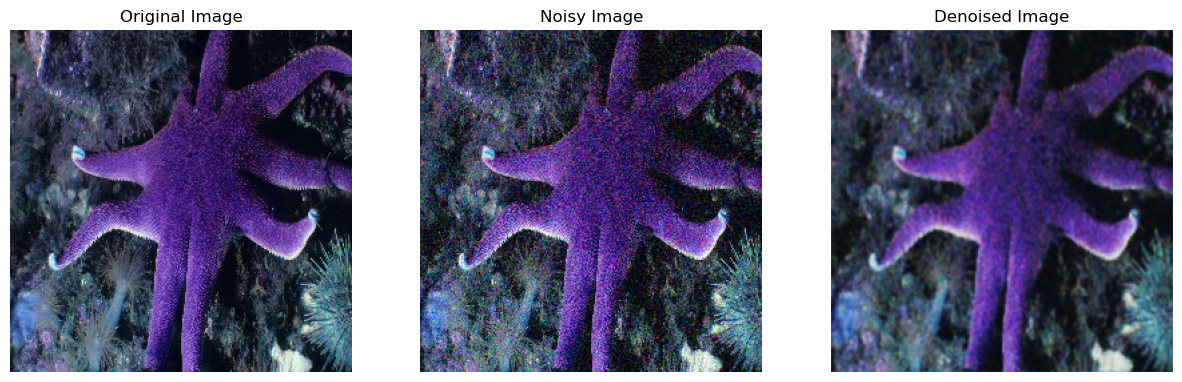

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Step 1: Load the model
model = load_model('denoising_model.h5', custom_objects={'MeanSquaredError': tf.keras.losses.MeanSquaredError})

# Step 2: Prepare a sample noisy image for testing
# Create a sample noisy image or load one from your dataset
# For demonstration, let's create a random noisy image:
original_image = cv2.imread(r'E:\SLIIT\Year 3\Semester 2\Digital Image Processing\Image Tool\Training Data\DIV2K_train_HR\0001.png')  # Load a clean image
original_image = cv2.resize(original_image, (256, 256)) / 255.0  # Resize and normalize
noise = np.random.normal(0, 0.1, original_image.shape)  # Add Gaussian noise
noisy_image = original_image + noise  # Create a noisy image
noisy_image = np.clip(noisy_image, 0, 1)  # Ensure values are between 0 and 1

# Step 3: Use the model for prediction
# Expand dimensions to match the input shape (1, height, width, channels)
noisy_image_expanded = np.expand_dims(noisy_image, axis=0)
denoised_image = model.predict(noisy_image_expanded)

# Step 4: Display the original, noisy, and denoised images
# Remove the batch dimension for visualization
denoised_image = np.squeeze(denoised_image)

# Plotting the images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(original_image)
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Noisy Image")
plt.imshow(noisy_image)
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Denoised Image")
plt.imshow(denoised_image)
plt.axis("off")

plt.show()
